In [1]:
import json
import networkx as nx
import os
from rdflib import Graph
from collections import defaultdict, Counter
import pandas as pd


In [2]:
# Initialize an empty graph
G = nx.Graph()

# categories = defaultdict(list)
def get_triples(folder_path):
# Read and parse each JSON file
    triples = []
    for filename in os.listdir(folder_path):
        
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as f:
                data = json.load(f)
                for triple in data:
                    subject = triple['subject']
                    predicate = triple['predicate']
                    object = triple['object']
                    
                    triples.append((subject, predicate, object))
                    # categories[category].append(triple)
                    G.add_edge(subject, object, label=predicate)
    return triples

# print("Loaded and parsed RDF triples from JSON files.")

In [ ]:
g = Graph()
def get_triples(folder_path):
# Read and parse each JSON file
    for filename in os.listdir(folder_path):
        
        if filename.endswith('.json'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as f:
                data = json.load(f)
                for index, triple in iterrows(data):
                    subject = triple['subject']
                    predicate = triple['predicate']
                    object = triple['object']
        
                    g.add((subject, predicate, object))
    return triples


In [7]:
# Computer scientists
folder_path_cs = 'computers_rdf'
triples = get_triples(folder_path_cs)
properties_cs = [p for s, p, o in triples]
predicate_cs = [p for s, p, o in triples]
subject_cs = [s for s, p, o in triples]
object_cs = [o for s, p, o in triples]
rdf_sculptor = pd.DataFrame({'subject': subject_cs, 'predicate': predicate_cs, 'object': object_cs, 'category': 'computer_scientists'})
rdf_sculptor.to_csv('rdf_cs.csv', index=False)
rdf_sculptor.head()


property_counts_cs = Counter(properties_cs)
top_50_properties_cs = property_counts_cs.most_common(50)
print(top_50_properties_cs)

[('http://www.w3.org/1999/02/22-rdf-syntax-ns#type', 3632), ('http://dbpedia.org/ontology/wikiPageWikiLink', 1719), ('http://purl.org/dc/terms/subject', 759), ('http://www.w3.org/2000/01/rdf-schema#label', 732), ('http://www.w3.org/2000/01/rdf-schema#comment', 606), ('http://www.w3.org/2002/07/owl#sameAs', 284), ('http://dbpedia.org/property/wikiPageUsesTemplate', 120), ('http://xmlns.com/foaf/0.1/depiction', 78), ('http://dbpedia.org/ontology/birthPlace', 76), ('http://dbpedia.org/property/birthPlace', 75), ('http://dbpedia.org/ontology/wikiPageExternalLink', 72), ('http://dbpedia.org/ontology/wikiPageID', 68), ('http://dbpedia.org/ontology/wikiPageRevisionID', 68), ('http://dbpedia.org/property/name', 55), ('http://xmlns.com/foaf/0.1/name', 54), ('http://dbpedia.org/ontology/birthDate', 42), ('http://www.w3.org/ns/prov#wasDerivedFrom', 23), ('http://dbpedia.org/ontology/wikiPageLength', 23), ('http://xmlns.com/foaf/0.1/homepage', 23), ('http://xmlns.com/foaf/0.1/isPrimaryTopicOf', 21

In [6]:
# Sculptors
folder_path_sculptors = 'sculptors_rdf'
triples = get_triples(folder_path_sculptors)
properties_sculptors = [p for s, p, o in triples]
predicates_sculptors = [p for s, p, o in triples]
subjects_sculptors = [s for s, p, o in triples]
objects_sculptors = [o for s, p, o in triples]
rdf_sculptor = pd.DataFrame({'subject': subjects_sculptors, 'predicate': predicates_sculptors, 'object': objects_sculptors, 'category': 'sculptor'})
rdf_sculptor.to_csv('rdf_sculptor.csv', index=False)


property_counts_sculptors = Counter(properties_sculptors)
top_50_properties_sculptors = property_counts_sculptors.most_common(50)
print(top_50_properties_sculptors)

[('http://www.w3.org/1999/02/22-rdf-syntax-ns#type', 2243), ('http://dbpedia.org/ontology/wikiPageWikiLink', 2157), ('http://purl.org/dc/terms/subject', 804), ('http://www.w3.org/2000/01/rdf-schema#label', 518), ('http://www.w3.org/2000/01/rdf-schema#comment', 481), ('http://www.w3.org/2002/07/owl#sameAs', 394), ('http://xmlns.com/foaf/0.1/depiction', 283), ('http://dbpedia.org/property/wikiPageUsesTemplate', 236), ('http://dbpedia.org/ontology/wikiPageID', 89), ('http://dbpedia.org/ontology/wikiPageRevisionID', 89), ('http://dbpedia.org/ontology/abstract', 86), ('http://dbpedia.org/ontology/birthPlace', 70), ('http://dbpedia.org/property/birthPlace', 68), ('http://dbpedia.org/ontology/wikiPageExternalLink', 58), ('http://xmlns.com/foaf/0.1/name', 50), ('http://dbpedia.org/property/name', 50), ('http://www.w3.org/ns/prov#wasDerivedFrom', 44), ('http://dbpedia.org/ontology/wikiPageLength', 43), ('http://xmlns.com/foaf/0.1/isPrimaryTopicOf', 42), ('http://dbpedia.org/ontology/birthDate',

In [137]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [142]:
def plot_wordcloud(property_counts):
    wordcloud = WordCloud(width=800, height=800, background_color='black').generate_from_frequencies(property_counts)

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig('wordcloud_sculptor_rdf.png')
    plt.show()
    return wordcloud

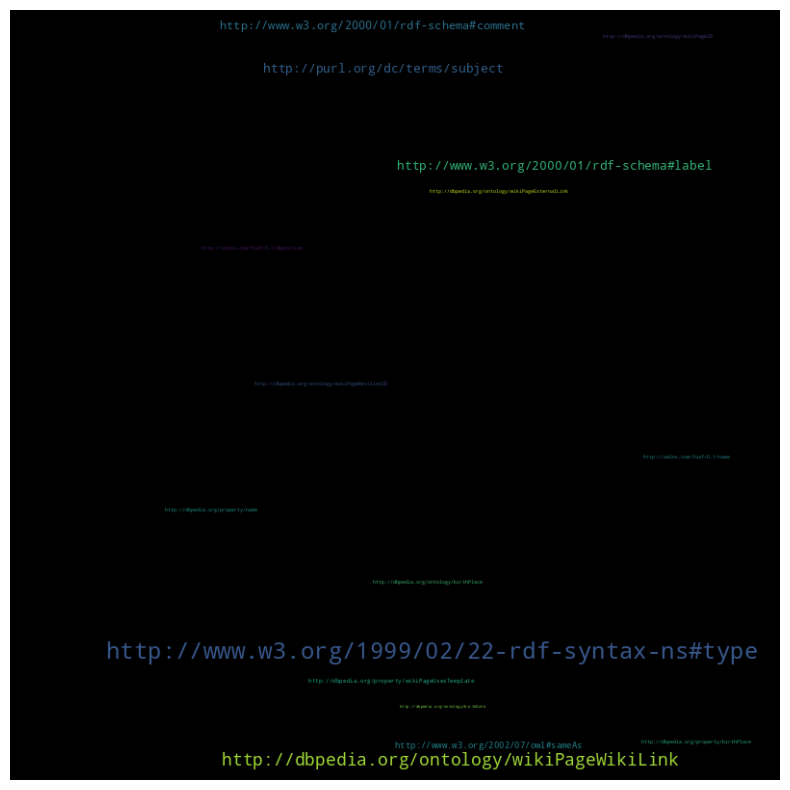

In [150]:
plot_wordcloud(property_counts_cs)

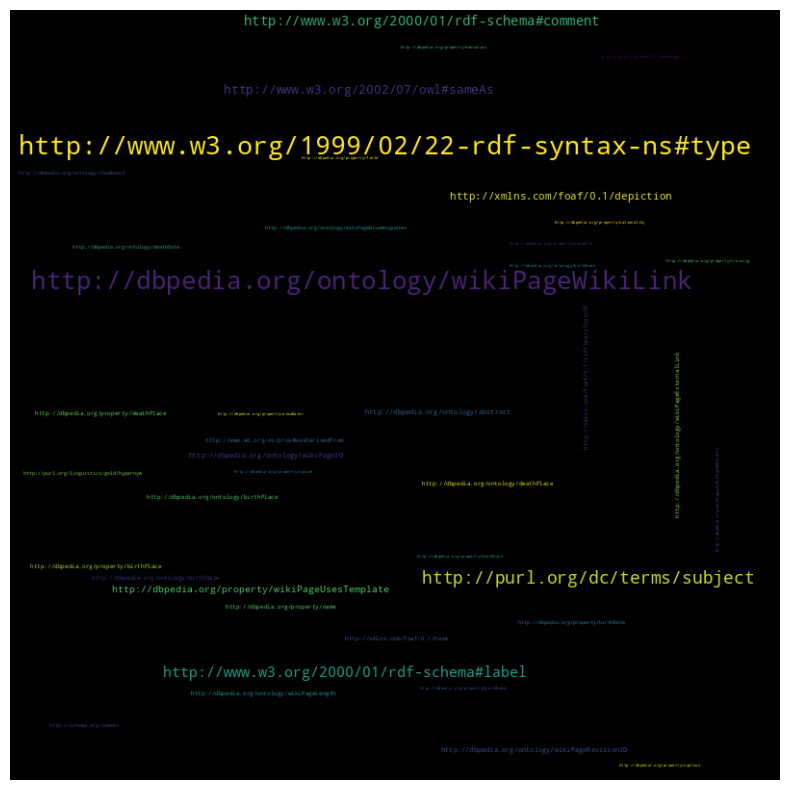

In [151]:
plot_wordcloud(property_counts_sculptors)

In [152]:
import seaborn as sns
import pandas as pd

In [164]:
facts_per_graph = []
# facts_per_category = []
facts = []

# Calculate facts per graph
def plots(path):
    for filename in os.listdir(path):
        if filename.endswith(".json"):
            file_path = os.path.join(path, filename)
            with open(file_path, 'r') as file:
                data = json.load(file)
                num_facts = len(data)  

                # category = data['category']
                facts.append((data, num_facts))
     # Convert to DataFrame 
    df_facts = pd.DataFrame(facts, columns=['property', 'num_facts'])
    # Calculate statistics
    min_facts = df_facts['num_facts'].min()
    max_facts = df_facts['num_facts'].max()
    avg_facts = df_facts['num_facts'].mean()

    print(f"Min facts: {min_facts}")
    print(f"Max facts: {max_facts}")
    print(f"Avg facts: {avg_facts:.2f}")

    # Create histograms
    plt.figure(figsize=(12, 6))
    sns.histplot(df_facts['num_facts'])
    plt.title('Histogram of Number of Facts')
    plt.xlabel('Number of Facts')
    plt.ylabel('Frequency')
    plt.savefig(f'hist_{path}.png')
    plt.show()

    # Create box plots
    plt.figure(figsize=(12, 6))
    sns.boxplot(df_facts['num_facts'])
    plt.title('Box Plot of Number of Facts ')
    plt.xlabel('Category')
    plt.ylabel('Number of Facts')
    plt.xticks(rotation=90)
    plt.savefig(f'box_{path}.png')
    plt.show()
    return df_facts


Min facts: 8
Max facts: 100
Avg facts: 89.91


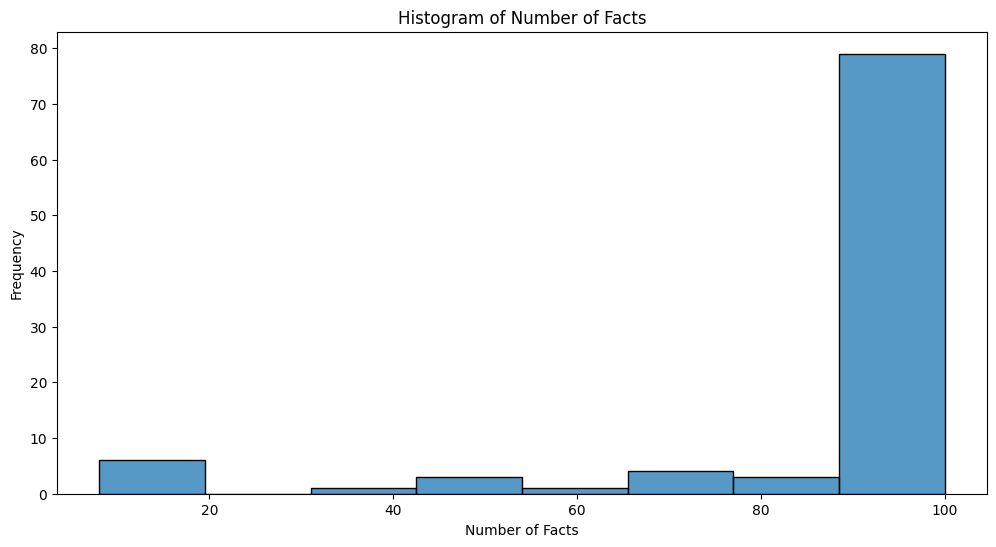

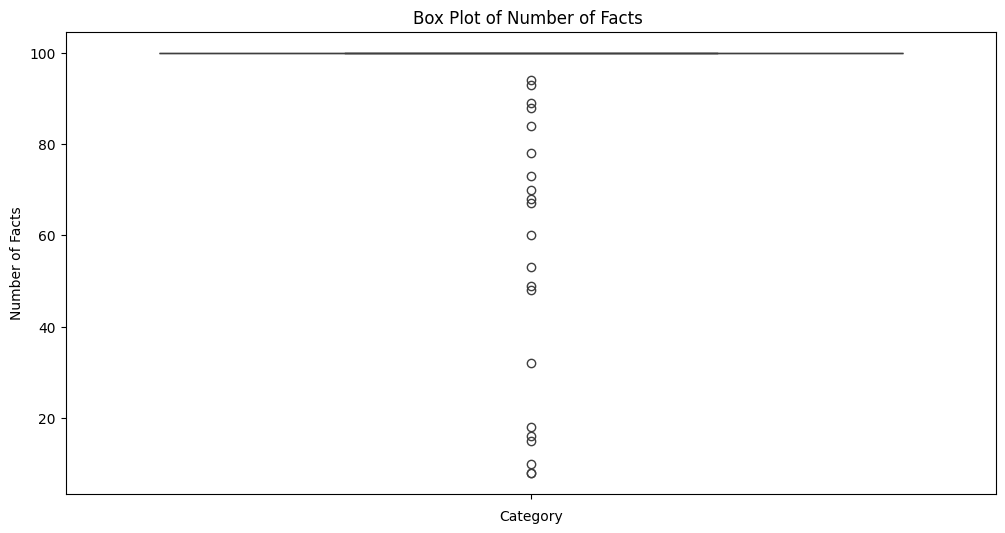

                                      Jeff Bezos.json  num_facts
0   [{'subject': 'http://dbpedia.org/resource/Anth...        100
1   [{'subject': 'http://dbpedia.org/resource/Lenn...         89
2   [{'subject': 'http://dbpedia.org/resource/Andr...         18
3   [{'subject': 'http://dbpedia.org/resource/Trac...        100
4   [{'subject': 'http://dbpedia.org/resource/Rod_...        100
..                                                ...        ...
92  [{'subject': 'http://dbpedia.org/resource/Dani...        100
93  [{'subject': 'http://dbpedia.org/resource/Mart...        100
94  [{'subject': 'http://dbpedia.org/resource/Edmu...        100
95  [{'subject': 'http://dbpedia.org/resource/Greg...        100
96  [{'subject': 'http://dbpedia.org/resource/Jeff...        100

[97 rows x 2 columns]


In [163]:
# Computer scientists
hist_rdf_cs = plots(folder_path_cs)
print(hist_rdf_cs)

Min facts: 8
Max facts: 100
Avg facts: 86.74


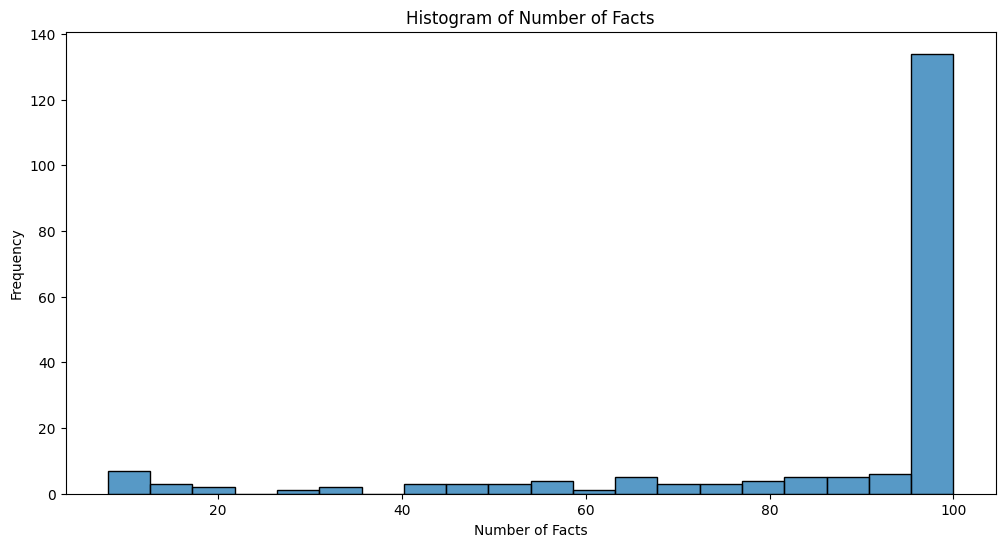

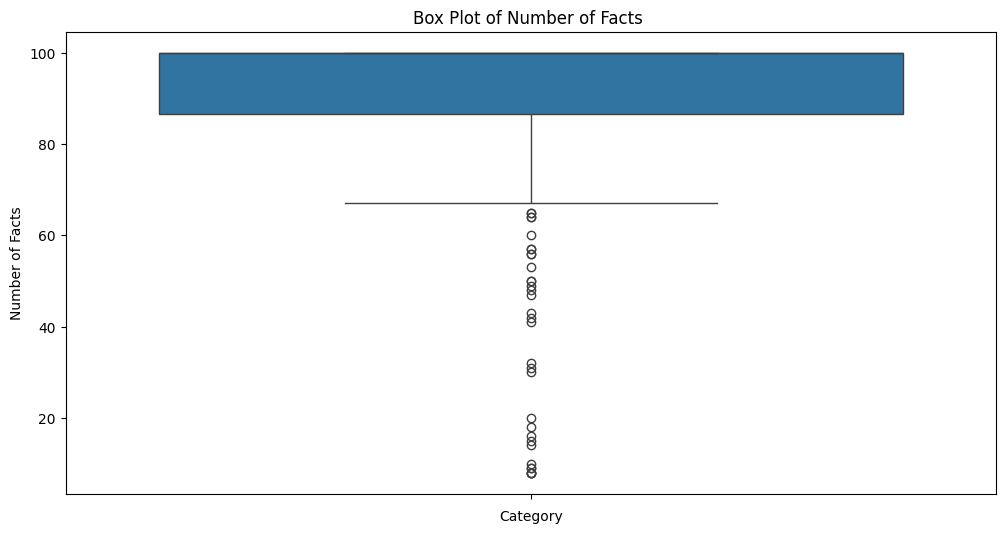

,property,num_facts
0,[{'subject': 'http://dbpedia.org/resource/Anth...,100
1,[{'subject': 'http://dbpedia.org/resource/Lenn...,89
2,[{'subject': 'http://dbpedia.org/resource/Andr...,18
3,[{'subject': 'http://dbpedia.org/resource/Trac...,100
4,[{'subject': 'http://dbpedia.org/resource/Rod_...,100
...,...,...
189,[{'subject': 'http://dbpedia.org/resource/Isa_...,42
190,[{'subject': 'http://dbpedia.org/resource/John...,100
191,[{'subject': 'http://dbpedia.org/resource/Joha...,100
192,[{'subject': 'http://dbpedia.org/resource/Nico...,100


In [161]:
# Sculptors
df_facts_sculptors = plots(folder_path_sculptors)
df_facts_sculptors